In [67]:
import bert_score
bert_score.__version__

'0.3.12'

In [68]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

In [70]:
from bert_score import BERTScorer

In [71]:
with open("data/hyps.txt", encoding="utf-8") as f:
    cands = [line.strip() for line in f]

with open("data/refs.txt", encoding="utf-8") as f:
    refs = [line.strip() for line in f]

In [72]:
scorer = BERTScorer(lang="ru")

In [46]:
P, R, F1 = scorer.score(cands, refs)
print(P)
print(R)
print(F1)

tensor([0.7142, 0.6319, 0.8055, 0.6421])
tensor([0.7289, 0.6362, 0.8194, 0.7152])
tensor([0.7215, 0.6340, 0.8124, 0.6767])


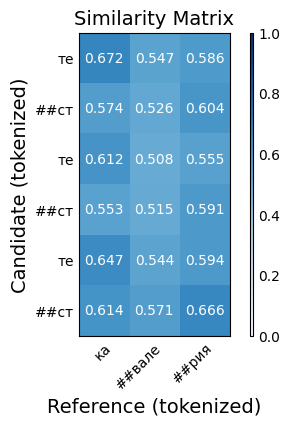

In [45]:
scorer.plot_example(cands[0], refs[1])

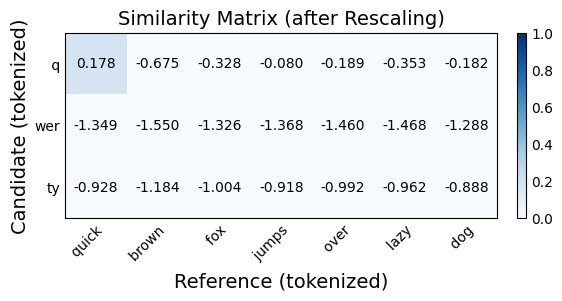

In [15]:
scorer.plot_example(cands[0], refs[1])

In [73]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')


# Example sentences
reference = ["the cat is on the mat"]
candidate = ["the cat is on mat"]

# Tokenize the reference and candidate
reference_tokenized = [nltk.word_tokenize(ref) for ref in reference]
candidate_tokenized = [nltk.word_tokenize(cand) for cand in candidate]

# BLEU Score Calculation using NLTK
bleu_score = sentence_bleu(reference_tokenized, candidate_tokenized[0])
print(f"BLEU Score (NLTK): {bleu_score * 100:.2f}")

# ROUGE Score Calculation using rouge-score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(reference[0], candidate[0])
print(f"ROUGE-1 F1 Score: {scores['rouge1'].fmeasure:.2f}")
print(f"ROUGE-L F1 Score: {scores['rougeL'].fmeasure:.2f}")


BLEU Score (NLTK): 57.89
ROUGE-1 F1 Score: 0.91
ROUGE-L F1 Score: 0.91


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tempest\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tempest\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [74]:
refs_tokenized = [nltk.word_tokenize(ref) for ref in refs]
cands_tokenized = [nltk.word_tokenize(cand) for cand in cands]

print(refs_tokenized)

print(cands_tokenized)


[['test', 'test', 'test'], ['кавалерия'], ['poppy', 'poppy'], ['test']]
[['test', 'test', 'test'], ['тест', 'тест', 'тест'], ['тест', 'тест', 'тест'], ['тест', 'тест', 'тест']]


In [76]:
bleu_score = sentence_bleu(refs_tokenized, cands_tokenized[0])
print(f"BLEU Score (NLTK): {bleu_score * 100:.2f}")
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(reference[0], candidate[0])
print(f"ROUGE-1 F1 Score: {scores['rouge1'].fmeasure:.2f}")
print(f"ROUGE-L F1 Score: {scores['rougeL'].fmeasure:.2f}")


BLEU Score (NLTK): 0.00
ROUGE-1 F1 Score: 0.91
ROUGE-L F1 Score: 0.91


In [ ]:
P, R, F1 = scorer.score(cands, refs)
print(P)
print(R)
print(F1)